In [30]:
import os
from os import listdir
from PIL import Image as Img
from numpy import asarray
from numpy import expand_dims
from matplotlib import pyplot
from keras.models import load_model
import numpy as np
import tensorflow as tf

import pickle
import cv2

In [32]:
#aar Cascade function dalam opencv function untuk detect lokasi wajah
'''So what is Haar Cascade? It is an Object Detection Algorithm used to identify faces in an image or a real time video. The algorithm uses edge or line detection
 features proposed by Viola and Jones in their research paper “Rapid Object Detection using a Boosted Cascade of Simple Features” published in 2001.'''
HaarCascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [34]:
# ni untuk retrive facenet_keras.h5 dari google drive, copy link dari google drive pastu buang yg view hujung.
!wget "https://drive.google.com/uc?export=download&id=1e_bB-RxGPoIzB72UvxdAwgbbiSRhH34h"

--2022-02-23 13:28:00--  https://drive.google.com/uc?export=download&id=1e_bB-RxGPoIzB72UvxdAwgbbiSRhH34h
Resolving drive.google.com (drive.google.com)... 173.194.69.102, 173.194.69.139, 173.194.69.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.69.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-5o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rv5a0la9e8nvsmgimclmt5j0lqd45ucj/1645622850000/05067839112608446570/*/1e_bB-RxGPoIzB72UvxdAwgbbiSRhH34h?e=download [following]
--2022-02-23 13:28:04--  https://doc-0g-5o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rv5a0la9e8nvsmgimclmt5j0lqd45ucj/1645622850000/05067839112608446570/*/1e_bB-RxGPoIzB72UvxdAwgbbiSRhH34h?e=download
Resolving doc-0g-5o-docs.googleusercontent.com (doc-0g-5o-docs.googleusercontent.com)... 173.194.69.132, 2a00:1450:4013:c04::84
Connecting to doc-0g-5o-docs.googleusercontent.com (doc-0g-5o-docs

In [ ]:
https://drive.google.com/file/d/1e_bB-RxGPoIzB72UvxdAwgbbiSRhH34h/view?usp=sharing

In [35]:
#load dataset training facenet_keras.h5
MyFaceNet = load_model("facenet_keras.h5")

In [36]:
#Create folder baru untuk simpan data or gambar orang yang kita nak train
folder='PersonPhotos/'
database = {}

for filename in listdir(folder):

    path = folder + filename
    gbr1 = cv2.imread(folder + filename)
    
    wajah = HaarCascade.detectMultiScale(gbr1,1.1,4)
    
    if len(wajah)>0:
        x1, y1, width, height = wajah[0]         
    else:
        x1, y1, width, height = 1, 1, 10, 10
        
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    
    gbr = cv2.cvtColor(gbr1, cv2.COLOR_BGR2RGB)
    gbr = Img.fromarray(gbr)                  # konversi dari OpenCV ke PIL
    gbr_array = asarray(gbr)
    
    face = gbr_array[y1:y2, x1:x2]                        
    
    face = Img.fromarray(face)                       
    face = face.resize((160,160))
    face = asarray(face)
    
    face = face.astype('float32')
    mean, std = face.mean(), face.std()
    face = (face - mean) / std
    
    face = expand_dims(face, axis=0)
    signature = MyFaceNet.predict(face)
    
    database[os.path.splitext(filename)[0]]=signature

error: ignored

In [37]:
#print out content of the database
database

{'KhaidIr Amir 3': array([[ 0.32187223, -0.7988168 , -0.799549  , -0.3152043 , -1.4911923 ,
          0.6049758 ,  0.43302467, -2.2142918 , -0.76308525,  1.385876  ,
         -2.112824  , -0.28263634, -1.3431135 , -0.9929248 , -1.5864129 ,
         -0.42382717,  0.74295664, -1.6748469 , -0.6052237 , -0.26626757,
          1.0158527 , -0.506036  , -1.4282438 , -0.36886293,  0.8099127 ,
          0.05886999,  0.60681474,  0.48358896,  0.20437656,  1.213823  ,
          1.6678774 ,  0.43075186,  0.6565728 , -1.1754911 , -0.47530466,
         -0.91044   , -1.2359669 , -0.2238333 ,  1.7444606 ,  0.2704326 ,
         -1.42406   ,  0.26809895, -1.0571219 , -0.5053648 ,  0.7517726 ,
          0.34771675, -0.3354257 ,  2.4106708 , -2.1382568 , -0.10038026,
         -0.3283521 ,  0.2561043 ,  0.9606398 , -0.7376418 ,  0.3685455 ,
          0.32361558, -0.11069882,  0.00895317,  1.2352984 , -0.7252685 ,
         -0.12384231, -1.6729702 , -1.1133183 ,  0.7540025 ,  0.6118299 ,
          0.99103594

In [38]:
#simpan database ke dalam file data.pkl
myfile = open("data.pkl", "wb")
pickle.dump(database, myfile)
myfile.close()

In [39]:
#load database data.pkl
myfile = open("data.pkl", "rb")
database = pickle.load(myfile)
myfile.close()

In [40]:
def js_to_image(js_reply): 
  image_bytes = b64decode(js_reply.split(',')[1])
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  img = cv2.imdecode(jpg_as_np, flags=1)
  return img

In [41]:
def findFaces(data): 
  gbr1 = js_to_image(data)
  gbr = cv2.cvtColor(gbr1, cv2.COLOR_BGR2RGB)
  gbr = Img.fromarray(gbr)                  # conversion dari OpenCV ke PIL
  gbr_array = asarray(gbr)
 
  wajah = HaarCascade.detectMultiScale(gbr1,1.1,4)
  
  for (x1,y1,w,h) in wajah:
      x1, y1 = abs(x1), abs(y1)
      x2, y2 = x1 + w, y1 + h
    
      face = gbr_array[y1:y2, x1:x2]                        
    
      face = Img.fromarray(face)                       
      face = face.resize((160,160))
      face = asarray(face)
    
      face = face.astype('float32')
      mean, std = face.mean(), face.std()
      face = (face - mean) / std
    
      face = expand_dims(face, axis=0)
      signature = MyFaceNet.predict(face)
    
      min_dist=100
      identity=' '
      for key, value in database.items() :
        dist = np.linalg.norm(value-signature)
        if dist < min_dist:
          min_dist = dist
          identity = key
            
      cv2.putText(gbr1,identity, (x1,y1),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1, cv2.LINE_AA)
      cv2.rectangle(gbr1,(x1,y1),(x2,y2), (0,255,0), 2)
  
  filename='photo.jpg'
  cv2.imwrite(filename, gbr1)
  
  return filename

In [ ]:
'''from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript(''''''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }'''
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename'''

In [42]:
#amik dari google punya pre existing function camera capture
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  
  filename=findFaces(data) 
  #findFaces input dari webcam masuk ke data

  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


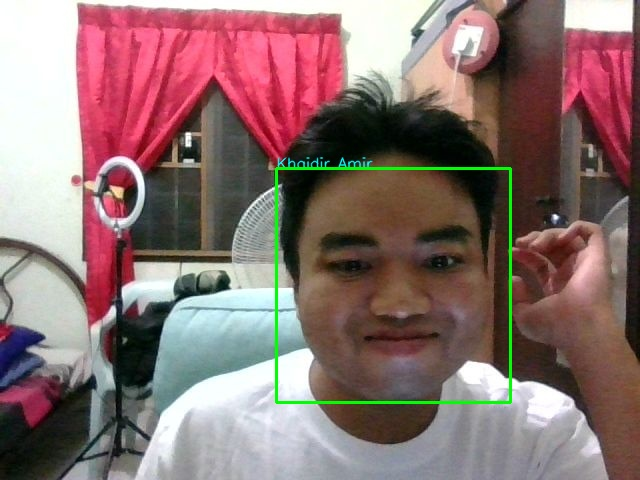

In [43]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))